In [1]:
import tensorflow as tf
from tensorflow import keras
from keras import models, layers
import numpy as np

print(tf.__version__)

2.17.0


In [2]:
weights = np.vstack( (np.ones((1,2,1,1)), np.zeros((1,2,1,1)) ) )
bias = np.zeros(1,)

w = [weights,bias]


Please note - upon upgrading tf, we now have to initialise a layer, then call set_weights.
We cannot pass weights to layer constructor.

Previously, we used input_shape on zero padding but this generates a warning in latest versions.

input_shape=(num_Pascal,num_Pascal,1)

In [3]:
num_Pascal = 12


def build_pascal_nn(num_Pascal = 16, w = w):
    """ 
    for a specified number of Pascal rows,
    repeat a conv and padding pattern.
    which is equivalent to summing 2 numbers from the above row
    """
    inputs = keras.Input(shape=(num_Pascal,num_Pascal,1))
    # initialise x and list of names
    layer_names = []
    x = inputs
    layer_names.append(x)
    for _ in range(num_Pascal):
        x = layers.ZeroPadding2D(
            padding=((1,0),(1,0)), 
            data_format='channels_last')(x)
        c = layers.Conv2D(1, kernel_size=(2,2),
            padding='valid')
        
        x = c(x)
        c.set_weights(w)
        
        layer_names.append(x)

    Mux = layers.Add()( layer_names  )
    model = keras.Model(inputs=inputs, outputs=Mux,  name="pascal_DAG" )
    for idx,layer in enumerate(model.layers):
        layer.trainable = False
        #layer._name = "layer_" + str(idx)
    model.compile()
    return model

In [4]:
model = build_pascal_nn(num_Pascal, w)
model.summary()

Model: "pascal_DAG"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                  ┃ Output Shape              ┃         Param # ┃ Connected to               ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)      │ (None, 12, 12, 1)         │               0 │ -                          │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ zero_padding2d                │ (None, 13, 13, 1)         │               0 │ input_layer[0][0]          │
│ (ZeroPadding2D)               │                           │                 │                            │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ conv2d (Conv2D)               │ (None, 12, 12, 1)         │               5 │ zero_padding2d[0][0]       │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ zero_padding2d_1              │ (None, 13, 13, 1)         │               0 │ conv2d[0][0]               │
│ (ZeroPadding2D)               │                           │                 │                            │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ conv2d_1 (Conv2D)             │ (None, 12, 12, 1)         │               5 │ zero_padding2d_1[0][0]     │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ zero_padding2d_2              │ (None, 13, 13, 1)         │               0 │ conv2d_1[0][0]             │
│ (ZeroPadding2D)               │                           │                 │                            │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ conv2d_2 (Conv2D)             │ (None, 12, 12, 1)         │               5 │ zero_padding2d_2[0][0]     │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ zero_padding2d_3              │ (None, 13, 13, 1)         │               0 │ conv2d_2[0][0]             │
│ (ZeroPadding2D)               │                           │                 │                            │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ conv2d_3 (Conv2D)             │ (None, 12, 12, 1)         │               5 │ zero_padding2d_3[0][0]     │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ zero_padding2d_4              │ (None, 13, 13, 1)         │               0 │ conv2d_3[0][0]             │
│ (ZeroPadding2D)               │                           │                 │                            │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ conv2d_4 (Conv2D)             │ (None, 12, 12, 1)         │               5 │ zero_padding2d_4[0][0]     │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ zero_padding2d_5              │ (None, 13, 13, 1)         │               0 │ conv2d_4[0][0]             │
│ (ZeroPadding2D)               │                           │                 │                            │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ conv2d_5 (Conv2D)             │ (None, 12, 12, 1)         │               5 │ zero_padding2d_5[0][0]     │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ zero_padding2d_6              │ (None, 13, 13, 1)         │               0 │ conv2d_5[0][0]             │
│ (ZeroPadding2D)               │                           │               

 Total params: 60 (240.00 B)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 60 (240.00 B)

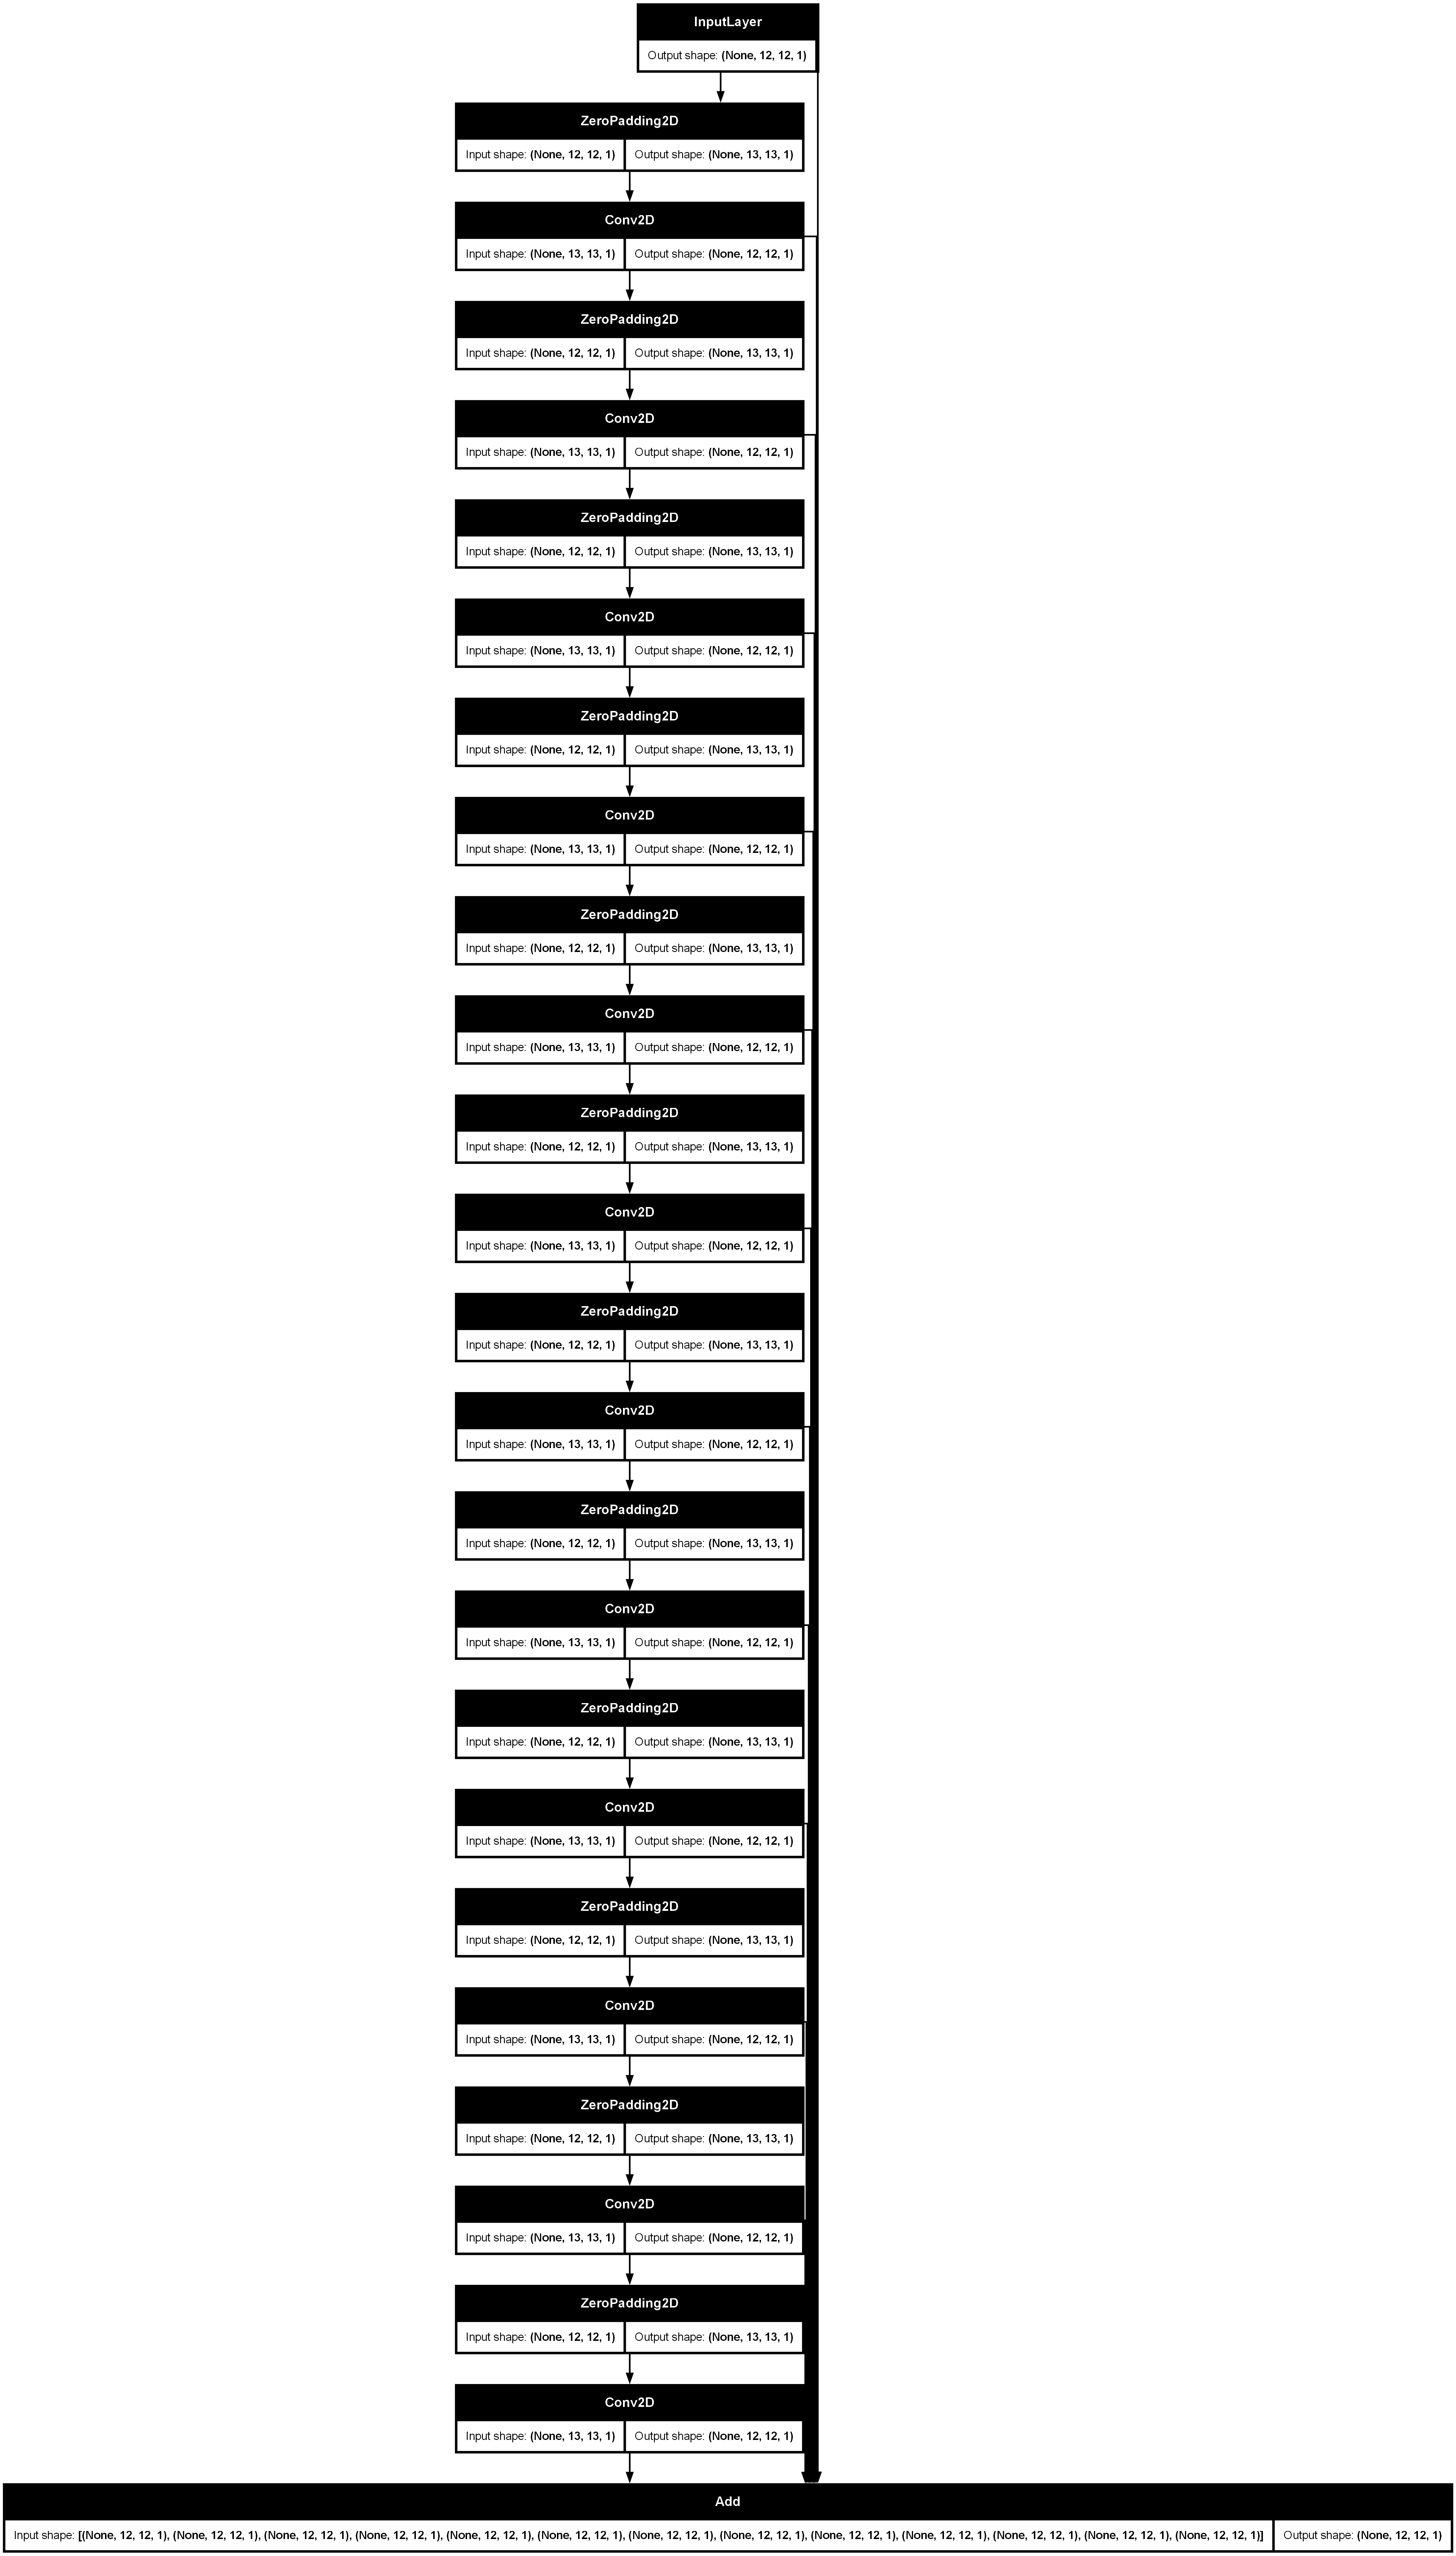

In [5]:
keras.utils.plot_model(model,"pascal_DAG.png", show_shapes=True)

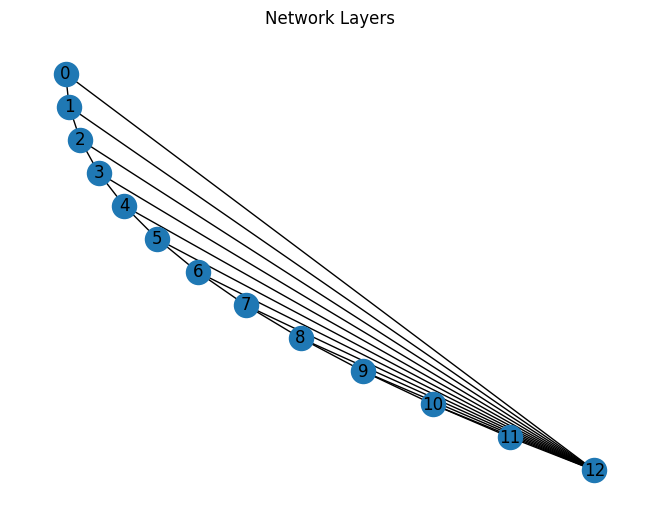

In [6]:
import networkx as nx
import matplotlib.pyplot as plt
edgefrom = np.arange(0, num_Pascal)
edgeto = edgefrom + 1
for e in range(num_Pascal):
    edgefrom = np.append(edgefrom, e)
    edgeto = np.append(edgeto, num_Pascal)
edgelist = list(zip(edgefrom, edgeto))
node_pos = list(zip(np.arange(num_Pascal+1)**2, np.arange(num_Pascal+1,0,-1)))
G = nx.Graph(edgelist)

nx.draw(G, pos=node_pos, with_labels=True )
plt.title("Network Layers")
plt.show()

In [7]:
inputData = np.zeros((num_Pascal,num_Pascal,1))
inputData[0,0,0] = 1
inputData = inputData[np.newaxis,:,:,:]
p = model.predict(inputData)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 266ms/step


In [8]:
print(np.squeeze(p))


[[  1.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.]
 [  1.   1.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.]
 [  1.   2.   1.   0.   0.   0.   0.   0.   0.   0.   0.   0.]
 [  1.   3.   3.   1.   0.   0.   0.   0.   0.   0.   0.   0.]
 [  1.   4.   6.   4.   1.   0.   0.   0.   0.   0.   0.   0.]
 [  1.   5.  10.  10.   5.   1.   0.   0.   0.   0.   0.   0.]
 [  1.   6.  15.  20.  15.   6.   1.   0.   0.   0.   0.   0.]
 [  1.   7.  21.  35.  35.  21.   7.   1.   0.   0.   0.   0.]
 [  1.   8.  28.  56.  70.  56.  28.   8.   1.   0.   0.   0.]
 [  1.   9.  36.  84. 126. 126.  84.  36.   9.   1.   0.   0.]
 [  1.  10.  45. 120. 210. 252. 210. 120.  45.  10.   1.   0.]
 [  1.  11.  55. 165. 330. 462. 462. 330. 165.  55.  11.   1.]]


In [9]:
model.save("pascal_model.keras")

In [10]:
loaded_model = keras.models.load_model("pascal_model.keras")

In [11]:
p = loaded_model.predict(inputData)
print(np.squeeze(p))


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 168ms/step
[[  1.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.]
 [  1.   1.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.]
 [  1.   2.   1.   0.   0.   0.   0.   0.   0.   0.   0.   0.]
 [  1.   3.   3.   1.   0.   0.   0.   0.   0.   0.   0.   0.]
 [  1.   4.   6.   4.   1.   0.   0.   0.   0.   0.   0.   0.]
 [  1.   5.  10.  10.   5.   1.   0.   0.   0.   0.   0.   0.]
 [  1.   6.  15.  20.  15.   6.   1.   0.   0.   0.   0.   0.]
 [  1.   7.  21.  35.  35.  21.   7.   1.   0.   0.   0.   0.]
 [  1.   8.  28.  56.  70.  56.  28.   8.   1.   0.   0.   0.]
 [  1.   9.  36.  84. 126. 126.  84.  36.   9.   1.   0.   0.]
 [  1.  10.  45. 120. 210. 252. 210. 120.  45.  10.   1.   0.]
 [  1.  11.  55. 165. 330. 462. 462. 330. 165.  55.  11.   1.]]


In [12]:
# rebuild to 16 layers and save model. 
model = build_pascal_nn(16, w)
model.save("pascal_model.keras")

Note that for 16 layers or more, printouts will be in scientific notation and not easily printed as integers.
We're going to use 16 rows here as its a power of 2 which is memory efficient and convenient in our next workbook